# Определение перспективного тарифа для телеком компании

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Для этого сделаем предварительный анализ тарифов на небольшой выборке клиентов, а именно о 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.

# Описание данных:

# Таблица users (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

# Таблица messages (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

# Таблица calls (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

# Таблица internet (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

# Таблица tariffs (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 

101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
#прочитаем 1-ый файл
calls= pd.read_csv('/datasets/calls.csv')
#посмотрим первые 5 строк таблицы
print('Таблица calls')
display(calls.head(5))
#просмотрим общую информации о таблице
print('\n Общая информация таблицы calls \n')
calls.info()

#Прочитаем остальные файлы и выведем из каждой 
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#посмотрим первые 5 строк таблиц и общую информации о таблицах
print('\n Таблица internet')
display(internet.head(5))
print('\n Общая информация таблицы internet \n')
internet.info()

print('\n Таблица messages') 
display(messages.head(5))
print('\n Общая информация таблицы messages \n')
messages.info()

print('\n Таблица tariffs')
display(tariffs.head(5))
print('\n Общая информация таблицы tariffs \n')
tariffs.info()

print('\n Таблица users')
display(users.head(5))
print('\n Общая информация таблицы users \n')
users.info()

Таблица calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



 Общая информация таблицы calls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

 Таблица internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



 Общая информация таблицы internet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

 Таблица messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



 Общая информация таблицы messages 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

 Таблица tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



 Общая информация таблицы tariffs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

 Таблица users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



 Общая информация таблицы users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


# Вывод

Было представлено 5 датасетов, в них содержится информация о совершенных звонках, израсходованном интернете, отправленных сообщениях, тарифах и информация о пользователях. Все файлы за исключением тарифов, содержит столбец ID по которому можно соединить данные.

# Шаг 2. Подготовьте данные

Приведем данные к нужным типам:

In [2]:
# Проверим дубликаты в таблице users
print ('Дубликатов в таблице до удаления:', users.duplicated().sum())
users  = users.drop_duplicates().reset_index(drop = True)
print ('Дубликатов в таблице восле удаления:', users.duplicated().sum())

Дубликатов в таблице до удаления: 0
Дубликатов в таблице восле удаления: 0



 Таблица calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000



 Количество уникальных значений длительности звонков 



0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64


Таблица после замены времени разговора 0 мин. на значение 1 мин.




,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Text(0.5, 1.0, '\n Гистограмма длительности звонков после замены времени разговора 0 мин. на значение 1 мин \n')

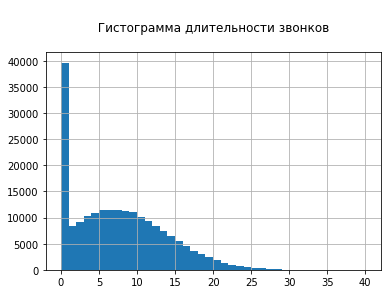

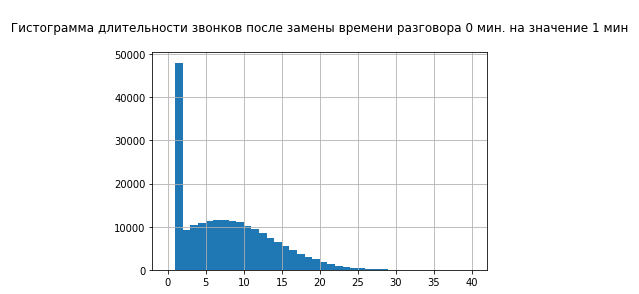

In [3]:
# Так как согласно тарифу если проговорили секунду, то время разговора округляется до минуты, поэтому округлим
# столбец calls['duration'] в большую сторону и заменим тип данных с float64 на int64, так как секнды больше не учитываются
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
print('\n Таблица calls')
display(calls.head(5))

#Оценим количество звонком по 0 минут. Посмотрим кол-во значений с длительностью 0 минут и построим гистограмму
print('\n Количество уникальных значений длительности звонков \n')
display(calls['duration'].sort_values(ascending = False).value_counts())
calls.hist('duration', bins=40, range=(0, 40))
plt.title('\n Гистограмма длительности звонков \n')

#В связи с тем, что нулевых значений очень много, заменим длительность звонка 0 минут на минимально возможное - 1 минута.
#Было сделано предположение что либо это очень коротнкие звонки и время не учлось, либо произошел сбой выгрузки.
# Но таких значений очень много и исключать их не надо. 
calls['duration'] = calls['duration'].replace(0,1)
print('\nТаблица после замены времени разговора 0 мин. на значение 1 мин.\n\n')
display(calls.head(5))

calls.hist('duration', bins=40, range=(0, 40))
plt.title('\n Гистограмма длительности звонков после замены времени разговора 0 мин. на значение 1 мин \n')

In [4]:
#Преобразуем столбцы с датой из формата object в формат datetime64
calls['call_date']= pd.to_datetime(calls['call_date'])
internet['session_date']= pd.to_datetime(internet['session_date'])
messages['message_date']= pd.to_datetime(messages['message_date'])
users['churn_date']= pd.to_datetime(users['churn_date'])
users['reg_date']= pd.to_datetime(users['reg_date'])
print('\n Информация о таблице calls \n')
calls.info()
print('\n Информация о таблице internet \n')
internet.info()
print('\n Информация о таблице messages \n')
messages.info()
print('\n Информация о таблице users \n')
users.info()


 Информация о таблице calls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

 Информация о таблице internet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB

 Информация о таблице messages 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-nul


 Таблица internet с новым столбцом, где использованные данные указаны в Гб


,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,112.95,2018-11-25,1000,0.110303
1,1,1000_1,1052.81,2018-09-07,1000,1.028135
2,2,1000_2,1197.26,2018-06-25,1000,1.169199
3,3,1000_3,550.27,2018-08-22,1000,0.537373
4,4,1000_4,302.56,2018-09-24,1000,0.295469


'Таблица с уникальными значениями тарифка'

0.000000    19598
0.328037        9
0.436816        9
0.192930        9
0.466816        8
            ...  
0.592598        1
0.224414        1
0.469668        1
0.049912        1
0.323984        1
Name: gb_used, Length: 70003, dtype: int64

Среднее значение использованного трафика: 0.3615160413771327 Гб


Text(0.5, 1.0, '\n Гистограмма интернет-трафика после замены нулевых значений на средние \n')

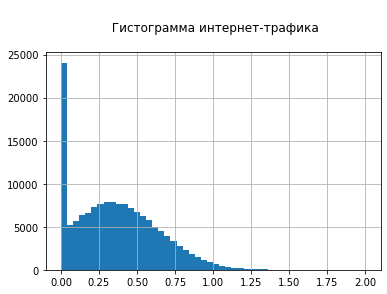

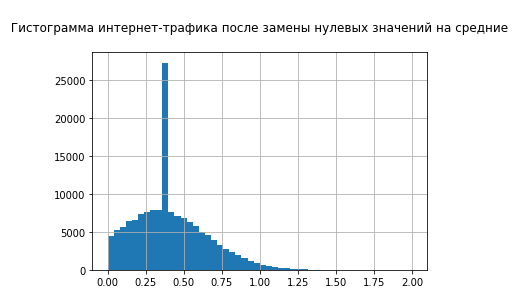

In [5]:
#Переведем Мегобайты в Гигобайты и запишем полученные данные в новый столбец таблицы internet
internet['gb_used'] = (internet['mb_used']/1024)
print('\n Таблица internet с новым столбцом, где использованные данные указаны в Гб')
display(internet.head(5))

display('Таблица с уникальными значениями тарифка',internet['gb_used'].sort_values(ascending = False).value_counts())
internet.hist('gb_used', bins=50, range=(0, 2))
plt.title('\n Гистограмма интернет-трафика\n')
# Очень много нулевых значений в интернет-трафике, возможно произошел сбой и данные не учлись, либо 
# ошибка при выгрузке. В связи с чем, сделаем замену нулевых значений на средние значение. 
internet_mean = internet['gb_used'].mean()
print('Среднее значение использованного трафика:', internet_mean, 'Гб')
internet['gb_used'] = internet['gb_used'].replace(0,internet_mean)
# Построим гистограмму после замены нулевыхь значение на среднее
internet.hist('gb_used', bins=50, range=(0, 2))
plt.title('\n Гистограмма интернет-трафика после замены нулевых значений на средние \n')

In [6]:
#Заменим в таблице users нулевые значения в столбце churn_date на дату выгрузки таблицы. Чтобы в далнейшем можно  
# было посчитать кол-во не отключенных клиентов
users = users.fillna('2019-01-01') #заменим нулевые значения на дату, Т.к. анализируем весь 2018 год, установим дату следующего дня
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') # приведм формат даты в одинаковый вид
print('\nТаблица users, где заменили пропуски даты отключения на дату выгрузки таблицы')
display(users.head(5))


Таблица users, где заменили пропуски даты отключения на дату выгрузки таблицы


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


# Вывод

Проверили таблицу users на дубликаты, в результате дубликаты не были обнаружены.
Так как согласно тарифу если проговорили секунду, то время разговора округляется до минуты, поэтому округлим
столбец duration в датасете calls в большую сторону и заменили тип данных с float64 на int64, так как секнды больше не учитываются.
Оценили количество звонков с длительностью 0 минут и построили гистограмму. Получилось, что таких значений очень много и было сделано предаоложение, что это либо очень короткие звонки, либо абонент не принял звонок, поэтому нулевые значения заменили на 1 
Преобразовали столбцы с датой из формата object в формат datetime64 во всех датасетах, в том числе и в датасете users, где присутствует ата регистрации и дата отключения.
Перевели Мегобайты в Гигобайты в датасете internet и запиcали полученные данные в новый столбец. Замели данные с нулевым интернет-трафиком на вычесленное среднее значение.
Заменили в таблице users нулевые значения в столбце churn_date на дату выгрузки таблицы, чтобы в далнейшем можно было посчитать количество не отключенных клиентов.

Посчитаем для каждого пользователя:
1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам;
4. Помесячную выручку с каждого пользователя

In [7]:
#Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам;

#Добавим новый столбец с месяцем в 3 таблицы
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
print('\nТаблица calls с добавленым столбцом месяц')
display(calls.head(3))
print('\nТаблица internet с добавленым столбцом месяц')
display(internet.head(3))
print('\nТаблица messages с добавленым столбцом месяц')
display(messages.head(3))

#Объеденим таблицу calls и messages
calls_messages = calls.merge(messages, on=['user_id', 'month'])
calls_messages.reset_index()
#сделаем pivot для двух таблиц, сгруппируем по user_id и посчитаем кол-во и длительность звонков:
calls_group = calls.pivot_table(index=['user_id', 'month'], values='duration',aggfunc=['sum','count'])
calls_group.columns = ['sum_duration', 'count_duration']
calls_group.reset_index()
print('\n Таблица с кол-вом звонков и длительностью для каждого пользователя')
display(calls_group.head(5))


Таблица calls с добавленым столбцом месяц


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6



Таблица internet с добавленым столбцом месяц


,Unnamed: 0,id,mb_used,session_date,user_id,gb_used,month
0,0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,2,1000_2,1197.26,2018-06-25,1000,1.169199,6



Таблица messages с добавленым столбцом месяц


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8



 Таблица с кол-вом звонков и длительностью для каждого пользователя


sum_duration  count_duration
user_id month                              
1000    5               164              22
        6               187              43
        7               346              47
        8               418              52
        9               478              58

In [8]:
#Рассчитаем количество отправленных сообщений по месяцам
#Создадим сводную таблицу и рассчитаем количество сообщений для каждого абонента:
messages_group = messages.pivot_table(index = ['user_id', 'month'],values = 'id', aggfunc = ['count'])
messages_group.columns = ['count_message']
messages_group.reset_index()
print('\n Таблица с кол-вом сообщений для каждого пользователя по месяцам')
display(messages_group.head(5))


 Таблица с кол-вом сообщений для каждого пользователя по месяцам


count_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

In [9]:
#Рассчитаем объем израсходованного интернет-трафика по месяцам

internet_group = internet.pivot_table(index = ['user_id', 'month'],values = 'gb_used', aggfunc = ['sum'])
internet_group.columns = ['gb_sum']
internet_group.reset_index()
print('\n Таблица с кол-вом использованного трафика для каждого пользователя по месяцам')
display(internet_group.head(5))


 Таблица с кол-вом использованного трафика для каждого пользователя по месяцам


gb_sum
user_id month           
1000    5       2.562190
        6      24.496809
        7      14.036946
        8      14.449526
        9      14.950483

In [10]:
#Рассчитаем помесячную выручку с каждого пользователя
# Объединим таблицу со звонками и таблицу с сообщениями
calls_messages_merge = calls_group.merge(messages_group, on=['user_id', 'month'], how='outer')
calls_messages_merge.reset_index()
print('\nОбъединенная таблица звонков и сообщений')
display(calls_messages_merge.head(3))

# Объединим таблицу со звонками и сообщениями с таблицей интернет
total_date = calls_messages_merge.merge(internet_group, on=['user_id', 'month'],how='outer')
total_date.reset_index()
print('\nОбъединенная таблица звонков и сообщений c таблицей интернет')
display(total_date.head(3))

# Объединим таблицу таблицу total date с таблицей users
total_date_users = total_date.merge(users, on=['user_id'], how='outer')
total_date_users.reset_index()
print('\nОбъединенная таблица c таблицей users')
display(total_date_users.head(3))

# Округлим интернет трафик в большую сторону до кратных Гигобайту
total_date_users['gb_sum'] = total_date_users['gb_sum'].apply(np.ceil)

pay_smart = 550 #абонентская плата тарифа smart
pay_ultra = 1950 #абонентская плата тарифа smart

def limit(row):
    if row['tariff'] == 'smart':
        if row['count_message'] > 50:
            messages_pay_extra = (row['count_message'] - 50)*3
        else:
            messages_pay_extra = 0
        if row['sum_duration'] > 500:
            calls_pay_extra = (row['sum_duration'] - 500)*3
        else:
            calls_pay_extra = 0
        if row['gb_sum'] > 15:
            gb_pay_extra = (row['gb_sum'] - 15)*200
        else:
            gb_pay_extra = 0
        final_pay =  messages_pay_extra + calls_pay_extra + gb_pay_extra + pay_smart
    if row['tariff'] == 'ultra':
        if row['count_message'] > 1000:
            messages_pay_extra = (row['count_message'] - 1000)*1
        else:
            messages_pay_extra = 0
        if row['sum_duration'] > 3000:
            calls_pay_extra = (row['sum_duration'] - 3000)*1
        else:
            calls_pay_extra = 0
        if row['gb_sum'] > 30:
            gb_pay_extra = (row['gb_sum'] - 30)*150
        else:
            gb_pay_extra = 0
        final_pay =  messages_pay_extra + calls_pay_extra + gb_pay_extra + pay_ultra
    return final_pay
            

total_date_users['final_pay'] = total_date_users.apply(limit, axis=1)
print('\nТаблица с данными по выручки на каждого абонента')
display(total_date_users.head(3))


Объединенная таблица звонков и сообщений


sum_duration  count_duration  count_message
user_id month                                             
1000    5             164.0            22.0           22.0
        6             187.0            43.0           60.0
        7             346.0            47.0           75.0


Объединенная таблица звонков и сообщений c таблицей интернет


sum_duration  count_duration  count_message     gb_sum
user_id month                                                        
1000    5             164.0            22.0           22.0   2.562190
        6             187.0            43.0           60.0  24.496809
        7             346.0            47.0           75.0  14.036946


Объединенная таблица c таблицей users


,user_id,sum_duration,count_duration,count_message,gb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,164.0,22.0,22.0,2.562190,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,187.0,43.0,60.0,24.496809,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,346.0,47.0,75.0,14.036946,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra



Таблица с данными по выручки на каждого абонента


,user_id,sum_duration,count_duration,count_message,gb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,final_pay
0,1000,164.0,22.0,22.0,3.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,187.0,43.0,60.0,25.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,346.0,47.0,75.0,15.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


In [11]:
print('Информация о таблице total_date_users до обработки\n')
total_date_users.info()

#При использовании внешнего соединения таблиц, появились пропуски и  к нулевые значения. Возможно это абоненнты не учтенные 
# в соседнем датасете, т.е. в одном датасете они есть,а в другом датасете нет. Поэтому заполним пустые значения медианами.
total_date_users = total_date_users.fillna(0)
sum_duration_mean = total_date_users['sum_duration'].mean()
count_duration_mean = total_date_users['count_duration'].mean()
count_message_mean = total_date_users['count_message'].mean()
gb_sum_mean = total_date_users['gb_sum'].mean()

total_date_users['sum_duration'] = total_date_users['sum_duration'].replace(0,sum_duration_mean)
total_date_users['count_duration'] = total_date_users['count_duration'].replace(0,count_duration_mean)
total_date_users['count_message'] = total_date_users['count_message'].replace(0,count_message_mean)
total_date_users['gb_sum'] = total_date_users['gb_sum'].replace(0,gb_sum_mean)
display(total_date_users['sum_duration'].sort_values(ascending = False).value_counts())
print('Информация о таблице total_date_users после обработки\n')
total_date_users.info()

Информация о таблице total_date_users до обработки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int64
sum_duration      3174 non-null float64
count_duration    3174 non-null float64
count_message     2717 non-null float64
gb_sum            3203 non-null float64
age               3216 non-null int64
churn_date        3216 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
final_pay         3216 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


463.281716     42
516.000000     14
428.000000     12
455.000000     12
470.000000     12
               ..
965.000000      1
935.000000      1
867.000000      1
765.000000      1
1352.000000     1
Name: sum_duration, Length: 951, dtype: int64

Информация о таблице total_date_users после обработки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int64
sum_duration      3216 non-null float64
count_duration    3216 non-null float64
count_message     3216 non-null float64
gb_sum            3216 non-null float64
age               3216 non-null int64
churn_date        3216 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
final_pay         3216 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


# Вывод

Посчитали количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений и израсходованный интернет-трафик для каждого пользователя по месяцам. Для корректного расчета выручки, округлили интернет-трафик в большую сторону кратно ггигобайтом, т.к. дополнительный трафик предоставлется в размере не меньше 1 ГБ. Все данные совместили в одной таблице и рассчитали выручку для каждого пользователя по месяцам.

#  Шаг 3. Проанализируйте данные

Опишим поведение клиентов оператора, исходя из выборки. Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишим распределение.

In [12]:
#Посчитаем кол-во минут разговора, кол-во сообщений и объем интернет трафика в тарифе smart
smart = total_date_users.query('tariff == "smart"')
print('Тариф SMART')
print('Количество минут разговора в тарифе smart:', smart['sum_duration'].sum(),'мин.')
print('Количество сообщений в тарифе smart:', smart['count_message'].sum(),'шт.')
print('Объем интернет трафика в тарифе smart:', smart['gb_sum'].sum(),'Гб.\n\n')

#Посчитаем кол-во минут разговора, кол-во сообщений и объем интернет трафика в тарифе ultra
ultra = total_date_users.query('tariff == "ultra"')
print('Тариф ULTRA')
print('Количество минут разговора в тарифе ultra:', ultra['sum_duration'].sum(),'мин.')
print('Количество сообщений в тарифе ultra:', ultra['count_message'].sum(),'шт.')
print('Объем интернет трафика в тарифе ultra:', ultra['gb_sum'].sum(),'Гб.')



Тариф SMART
Количество минут разговора в тарифе smart: 960488.9720149254 мин.
Количество сообщений в тарифе smart: 86196.29850746269 шт.
Объем интернет трафика в тарифе smart: 42868.980099502485 Гб.


Тариф ULTRA
Количество минут разговора в тарифе ultra: 548882.8600746269 мин.
Количество сообщений в тарифе ultra: 55930.17537313432 шт.
Объем интернет трафика в тарифе ultra: 20064.390547263683 Гб.


In [13]:
#Посчитем среднее количество, дисперсию и стандартное отклонение.
print('Тариф SMART\n')
display(smart['final_pay'].describe())
print('\nCреднее значение выручки:', smart['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', smart['final_pay'].std(),'руб.')
variance =  np.var(smart['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

print('\n\nТариф ULTRA\n')
display(ultra['final_pay'].describe())
print('\nCреднее значение выручки:', ultra['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', ultra['final_pay'].std(),'руб.')
variance =  np.var(ultra['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')


Тариф SMART



count    2230.000000
mean     1773.605381
std      1078.863090
min       550.000000
25%       762.750000
50%      1619.000000
75%      2436.750000
max      8024.000000
Name: final_pay, dtype: float64


Cреднее значение выручки: 1773.6053811659192 руб.
Стандартное отклонение выручки: 1078.8630895783187 руб.
Дисперсия выручки: 1163945.5660544755 руб.


Тариф ULTRA



count     986.000000
mean     2097.109533
std       424.119586
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      5100.000000
Name: final_pay, dtype: float64


Cреднее значение выручки: 2097.1095334685597 руб.
Стандартное отклонение выручки: 424.1195863470985 руб.
Дисперсия выручки: 179877.42352323394 руб.


Text(0.5, 1.0, 'Гистограмма выручки для тарифа Ultra\n')

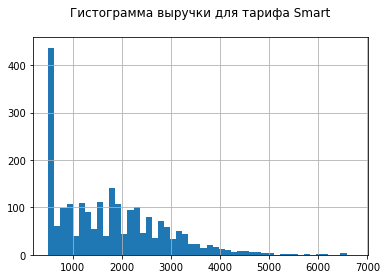

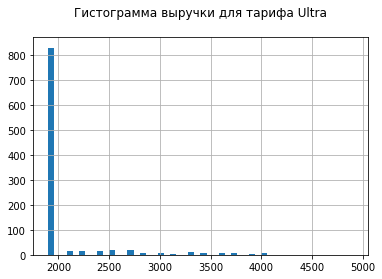

In [14]:
#Построим гистограммы опишим распределения.

#Построим гистограмму выручки дляя тарифа Smart
smart.hist('final_pay', bins=50, range=(500, 6700))
plt.title('Гистограмма выручки для тарифа Smart\n')

#Построим гистограмму выручки дляя тарифа Ultra
ultra.hist('final_pay', bins=50, range=(1900, 4900))
plt.title('Гистограмма выручки для тарифа Ultra\n')


Максимальное значение нормального распределения Тарифа Smart: 4947.75 (все что превышает значение максимального значения нормального распределения считаем выбросами)


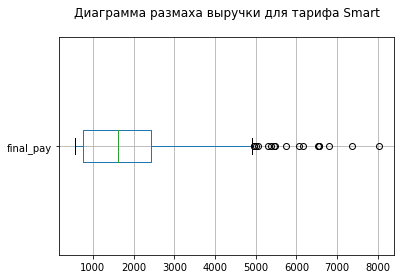

In [15]:
#Построим диаграмму размаха для двух тарифов
#Диаграмма размаха выручки для тарифа Smart
smart[['final_pay']].boxplot(vert=False)
plt.title('Диаграмма размаха выручки для тарифа Smart\n')
parameters_smart = smart[['final_pay']].describe().T
Q1, Q3 = parameters_smart['25%'][0], parameters_smart['75%'][0]
norm_quartus_smart = Q3-Q1
max_norm_quartus_smart = Q3 + 1.5*norm_quartus_smart
print('Максимальное значение нормального распределения Тарифа Smart:',max_norm_quartus_smart, '(все что превышает значение максимального значения нормального распределения считаем выбросами)')
#все что превышает значение максимального значения нормального распределения считаем выбросами.



Максимальное значение нормального распределения Тарифа Ultra: 1950.0 (все что превышает значение максимального значения нормального распределения считаем выбросами)


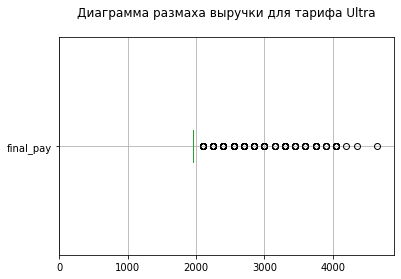

In [16]:
#Диаграмма размаха выручки для тарифа Ultra
ultra.boxplot('final_pay', vert=False)
plt.xlim(0, 4900) 
plt.title('Диаграмма размаха выручки для тарифа Ultra\n')
parameters_ultra = ultra[['final_pay']].describe().T
Q1, Q3 = parameters_ultra['25%'][0], parameters_ultra['75%'][0]
norm_quartus_ultra = Q3-Q1
max_norm_quartus_ultra = Q3 + 1.5*norm_quartus_ultra
print('Максимальное значение нормального распределения Тарифа Ultra:',max_norm_quartus_ultra, '(все что превышает значение максимального значения нормального распределения считаем выбросами)')
#все что превышает значение максимального значения нормального распределения считаем выбросами.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0.5, 1.0, 'Гистограмма сравнения интернет-трафика в тарифе Smart и Ultra \n')

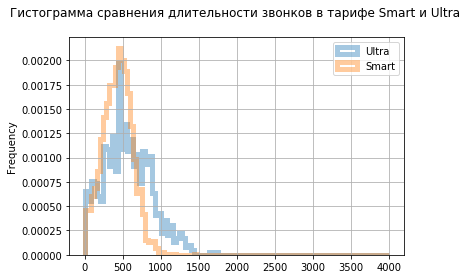

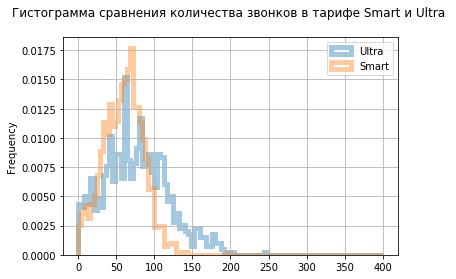

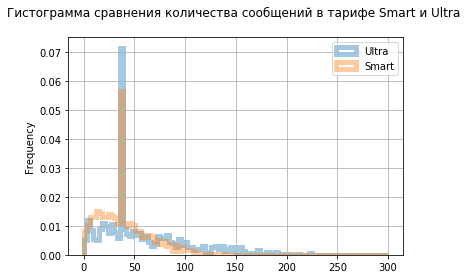

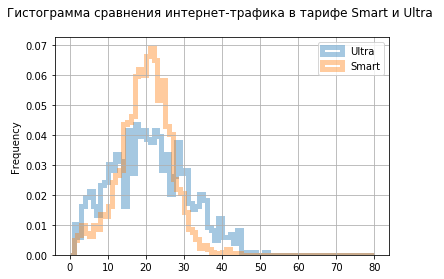

In [17]:
# Построим гисторграммы для отсальных параметров. Будем строит на одном графике сразу 2 гистограммы для сравнения. 
#Гистограмма сравнения длительности звонков в тарифе Smart и Ultra
ax = ultra.plot(kind='hist', y='sum_duration', histtype='step', range=(0, 4000), bins=100, normed=True, linewidth=5, alpha=0.4, label='Ultra')
smart.plot(kind='hist', y='sum_duration', histtype='step', range=(0, 4000), bins=100, normed=True, linewidth=5, alpha=0.4, label='Smart', ax=ax, grid=True, legend=True) 
plt.title('Гистограмма сравнения длительности звонков в тарифе Smart и Ultra \n')

#Гистограмма сравнения количества звонков в тарифе Smart и Ultra
ax = ultra.plot(kind='hist', y='count_duration', histtype='step', range=(0, 400), bins=100, normed=True, linewidth=5, alpha=0.4, label='Ultra')
smart.plot(kind='hist', y='count_duration', histtype='step', range=(0, 400), bins=100, normed=True, linewidth=5, alpha=0.4, label='Smart', ax=ax, grid=True, legend=True) 
plt.title('Гистограмма сравнения количества звонков в тарифе Smart и Ultra \n')

#Гистограмма сравнения количества сообщений в тарифе Smart и Ultra
ax = ultra.plot(kind='hist', y='count_message', histtype='step', range=(0, 300), bins=100, normed=True, linewidth=5, alpha=0.4, label='Ultra')
smart.plot(kind='hist', y='count_message', histtype='step', range=(0, 300), bins=100, normed=True, linewidth=5, alpha=0.4, label='Smart', ax=ax, grid=True, legend=True) 
plt.title('Гистограмма сравнения количества сообщений в тарифе Smart и Ultra \n')

#Гистограмма сравнения интернет-трафика в тарифе Smart и Ultra
ax = ultra.plot(kind='hist', y='gb_sum', histtype='step', range=(0, 80), bins=80, normed=True, linewidth=5, alpha=0.4, label='Ultra')
smart.plot(kind='hist', y='gb_sum', histtype='step', range=(0, 80), bins=80, normed=True, linewidth=5, alpha=0.4, label='Smart', ax=ax, grid=True, legend=True) 
plt.title('Гистограмма сравнения интернет-трафика в тарифе Smart и Ultra \n')


# Вывод

В тарифе Smart используется больше минут разговора, сообщений и интернет-данных в отличие от тарифа Ultra.
В тарифе Smart среднее значение выручки составляет 1773 руб., что гораздо больше, чем абонентская плата в размере 550 рублей. В тарифе Ultra среднее значение выручки 2097 руб., что очень рядом с абонентской платой в размере 1950 рублей. 
На гистограмме тарифа Smart видно, что не всем хватает этого тарифа и клиенты перерсаходуют миниту, сообщения и интернет-трафик. На гистограмме тарифа Ultra видно, что почти все клиенты укладываются в тариф.
На диаграмме размаха тарифа Smart максимальное значение нормального распределения 3550 руб., все что больше считаем выбросами.
На диаграмме размаха тарифа Ultra максимальное значение нормального распределения 1950 руб., все что больше считаем выбросами. И здесь среднее значение нормального распределения равна стоимости тарифа, что еще раз потдверждает, что клиентам Тарифа Ultra укладываются ы тариф. 

# Шаг 4. Проверьте гипотезы

Проверим две гипотизы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [18]:
#Проверим гипотизу средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

# Сначал найдем дисперсию и среднее для двух срезов данных:
print('Тариф SMART')
print('\nCреднее значение выручки:', smart['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', smart['final_pay'].std(),'руб.')
variance =  np.var(smart['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

print('\n\nТариф ULTRA')
print('\nCреднее значение выручки:', ultra['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', ultra['final_pay'].std(),'руб.')
variance =  np.var(ultra['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

# В связи с тем, что дисперсии сильно отличаются, поэтому при проверки гипотезы параметр equal_var установим как False,
# так как по умолчанию он задан как equal_var = True

print('\nПроверка гипотизы:\n')
smart_true_pay = smart['final_pay']
ultra_true_pay = ultra['final_pay']

alpha = .05# зададим критический уровень статистической значимости

results = st.ttest_ind(smart_true_pay, ultra_true_pay, equal_var = False)# проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



Тариф SMART

Cреднее значение выручки: 1773.6053811659192 руб.
Стандартное отклонение выручки: 1078.8630895783187 руб.
Дисперсия выручки: 1163945.5660544755 руб.


Тариф ULTRA

Cреднее значение выручки: 2097.1095334685597 руб.
Стандартное отклонение выручки: 424.1195863470985 руб.
Дисперсия выручки: 179877.42352323394 руб.

Проверка гипотизы:

p-значение: 1.9533091964130522e-33
Отвергаем нулевую гипотезу


# Вывод

Сформулиуем нулевую гипотезу (Н0), как что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Тогда альтернативная гипотиза (Н1) будет сформулирована, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.
Для проверки сгипотиз выберим гипотезу о равенстве средних двух генеральных совокупностей. Выберим эту гипотезу, так как у нас две генеральные совокупности, одна совокупность - это тариф Smart, вторая - это тариф Ultra. В результате получаем, что нулевая гипотеза отвергается, что означает, что средняя выручка у тарифов разная. Если пологаться на данные полученные раньше, средняя вручка тарифа Смарт была 1775 руб., а для тарифа Ультра - 2047 руб.

In [19]:
#Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других 
# регионов для тарифа Smart

#Сделаем два среза для тарифа Smart, где пользователи из Москвы и где пользователи из других регионов
print('Сравнение выручки Москвы с другими регионами в тарифе Smart')
moscow_smart = smart.query('city == "Москва"')
moscow_city = moscow_smart ['final_pay']

other = smart.query('city != "Москва"')
other_city = other['final_pay']

# Найдем дисперсию и среднее для двух срезов данных:
print('\nТариф SMART г.Москва\n')
print('Cреднее значение выручки:', moscow_smart['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', moscow_smart['final_pay'].std(),'руб.')
variance =  np.var(moscow_smart['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

print('\nТариф SMART другие регионы:\n')
print('Cреднее значение выручки:', other['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', other['final_pay'].std(),'руб.')
variance =  np.var(other['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')


# В связи с тем, что дисперсии отличаются, поэтому при проверки гипотезы параметр equal_var установим как False,
# так как по умолчанию он задан как equal_var = True

print('\nПроверка гипотизы:\n')

alpha = .05 # зададим критический уровень статистической значимости

results = st.ttest_ind(moscow_city, other_city, equal_var = False)# проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Сравнение выручки Москвы с другими регионами в тарифе Smart

Тариф SMART г.Москва

Cреднее значение выручки: 1722.6839378238342 руб.
Стандартное отклонение выручки: 1022.4153696795255 руб.
Дисперсия выручки: 1045333.1881569207 руб.

Тариф SMART другие регионы:

Cреднее значение выручки: 1784.2646420824294 руб.
Стандартное отклонение выручки: 1090.2744179730735 руб.
Дисперсия выручки: 1188698.3064865242 руб.

Проверка гипотизы:

p-значение: 0.28798793556358787
Не получилось отвергнуть нулевую гипотезу


# Вывод

Для проверки гипотизы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других 
регионов для тарифа Smart выберим гипотезу о равенстве средних двух генеральных совокупностей.
Выберим эту гипотезу, так как у нас две генеральные совокупности, одна совокупность - это пользователи из города Москва, вторая - это пользователи с других регионов. 
Сформулиуем нулевую гипотезу (Н0), так что средняя выручка пользователей из Москвы равна средней выручка пользователей из других регионов в тарифе Smart. Тогда альтернативная гипотиза (Н1) будет сформулирована, что средняя выручка пользователей из Москвы не равна средней выручка пользователей из других регионов в тарифе Smart.
В результате получаем, что нулевая гипотеза не отвергается, что означает, что средняя выручка у Москвы и у регионов в тарифе Smart равны. 

In [20]:
#Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других 
# регионов для тарифа Ultra

#Сделаем два среза для тарифа Ultra, где пользователи из Москвы и где пользователи из других регионов
print('Сравнение выручки Москвы с другими регионами в тарифе Ultra')
moscow_ultra = ultra.query('city == "Москва"')
moscow_city_ultra = moscow_ultra['final_pay']

other_ultra = ultra.query('city != "Москва"')
other_city_ultra = other_ultra['final_pay']


# Найдем дисперсию и среднее для двух срезов данных:
print('\nТариф ULTRA г.Москва\n')
print('Cреднее значение выручки:', moscow_ultra['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', moscow_ultra['final_pay'].std(),'руб.')
variance =  np.var(moscow_ultra['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

print('\nТариф ULTRA другие регионы:\n')
print('Cреднее значение выручки:', other_ultra['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', other_ultra['final_pay'].std(),'руб.')
variance =  np.var(other_ultra['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')


# В связи с тем, что дисперсии отличаются, поэтому при проверки гипотезы параметр equal_var установим как False,
# так как по умолчанию он задан как equal_var = True

print('\nПроверка гипотизы:\n')

alpha = .05 # зададим критический уровень статистической значимости

results = st.ttest_ind(moscow_city_ultra, other_city_ultra)# проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Сравнение выручки Москвы с другими регионами в тарифе Ultra

Тариф ULTRA г.Москва

Cреднее значение выручки: 2109.3333333333335 руб.
Стандартное отклонение выручки: 403.0320352386041 руб.
Дисперсия выручки: 162434.82142857142 руб.

Тариф ULTRA другие регионы:

Cреднее значение выручки: 2093.495400788436 руб.
Стандартное отклонение выручки: 430.34610036253434 руб.
Дисперсия выручки: 185197.76609724047 руб.

Проверка гипотизы:

p-значение: 0.6228907118761158
Не получилось отвергнуть нулевую гипотезу


# Вывод:

Для проверки гипотизы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других 
регионов для тарифа Ultra, выберим гипотезу о равенстве средних двух генеральных совокупностей.
Выберим эту гипотезу, так как у нас две генеральные совокупности, одна совокупность - это пользователи из города Москва, 
вторая - это пользователи с других регионов. 
Сформулиуем нулевую гипотезу (Н0), так что средняя выручка пользователей из Москвы равна средней выручка пользователей
из других регионов в тарифе Ultra. Тогда альтернативная гипотиза (Н1) будет сформулирована, что средняя выручка 
пользователей из Москвы не равна средней выручка пользователей из других регионов в тарифе Smart.
В результате получаем, что нулевая гипотеза не отвергается, что означает, что средняя выручка у Москвы и у регионов 
в тарифе Ultra равны. 

In [21]:
#Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других 
# регионов вне зависимоти от тарифа

#Сделаем два среза для тарифа Ultra, где пользователи из Москвы и где пользователи из других регионов
print('Сравнение выручки Москвы с другими регионами независимо от тарифа')
moscow_all = total_date_users.query('city == "Москва"')
moscow_city_all = moscow_all['final_pay']

other_all = total_date_users.query('city != "Москва"')
other_city_all = other_all['final_pay']

# Найдем дисперсию и среднее для двух срезов данных:
print('\nАбоненты г.Москва\n')
print('Cреднее значение выручки:', moscow_all['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', moscow_all['final_pay'].std(),'руб.')
variance =  np.var(moscow_all['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

print('\nАбоненты другие регионы:\n')
print('Cреднее значение выручки:', other_all['final_pay'].mean(),'руб.')
print('Стандартное отклонение выручки:', other_all['final_pay'].std(),'руб.')
variance =  np.var(other_all['final_pay'], ddof=1)
print('Дисперсия выручки:', variance, 'руб.')

# В связи с тем, что дисперсии отличаются, поэтому при проверки гипотезы параметр equal_var установим как False,
# так как по умолчанию он задан как equal_var = True


alpha = .05 # зададим критический уровень статистической значимости

results = st.ttest_ind(moscow_city_all, other_city_all, equal_var = False)# проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Сравнение выручки Москвы с другими регионами независимо от тарифа

Абоненты г.Москва

Cреднее значение выручки: 1865.0671031096563 руб.
Стандартное отклонение выручки: 868.4722692032469 руб.
Дисперсия выручки: 754244.0823750369 руб.

Абоненты другие регионы:

Cреднее значение выручки: 1874.6003838771594 руб.
Стандартное отклонение выручки: 956.6311266726866 руб.
Дисперсия выручки: 915143.1125190539 руб.
p-значение: 0.8108443980239145
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотизы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других 
регионов независимо от тарифа, выберим гипотезу о равенстве средних двух генеральных совокупностей.
Выберим эту гипотезу, так как у нас две генеральные совокупности, одна совокупность - это пользователи из города Москва, 
вторая - это пользователи с других регионов. 
Сформулиуем нулевую гипотезу (Н0), так что средняя выручка пользователей из Москвы равна средней выручка пользователей
из других регионов независимо от тарифа. Тогда альтернативная гипотиза (Н1) будет сформулирована, что средняя выручка 
пользователей из Москвы не равна средней выручка пользователей из других регионов независимо от тарифа.
В результате получаем, что нулевая гипотеза не отвергается, что означает, что средняя выручка у Москвы не отличается от средней выручки у регионов, если не принимать во внимание тариф. 

# Общий вывод

Проанализировав полученные датасеты на входе, было найдены ошибки в данных. В датасете internet, было много нулевых значений, которые были заменены на найденное среднее значение. В датасете calls присутствовали нулевые значения по длительности звонков. Было выдвинуты предположение, что это либо не отмеченные звонки, либо какой-то сбой при выгрузке данных. В результате нулевые значения заменили на минимально возможное время разговора - 1 минуту. Также сделан перевод интернет-трафика из Мб в Гб. Во всех датасетах столбцы содержащие данные о дате преобразованы из формата object в формат datetime64.
Произведен подсчёт длительности и количества звонков, количества отправленных сообщений и израсходованного трафика по  месяцам для каждого абонента. На основании полученных данных произведено объединение таблицы в один общий датасет, на основании которого посчитана средняя выручка по двум тарифам. Средняя выручка тарифа Ultra выше чем у тарифа Smart и составляет 2097 руб., а в тарифе Smart - выручка составляет -  1773 руб. Пользователи тарифа Ultra практически не выходят за рамки тарифа, чего нельзя сказать про пользователей тарифа Smart. 
На основании полученных данных построены гистограммы для сравнения двух тарифов. В тарифе Smart длительность разговор более короткая, количество звонков и отправляемых сообщений меньше, а также используется меньшее количество трафика. 
При проверки гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» была посчитана дисперсия двух срезов и она отличалась, поэтому чтобы увеличить точность сравнения был введен параметр equal_var и ему присвоено значение False, так как по умолчанию его значение True.  Гипотезу проверяли гипотезой о равенстве средних двух генеральных совокупностей. В результате получаем, что нулевая гипотеза отвергается, что означает, что средняя выручка у тарифов разная. Согласно полученным данным средняя выручка тарифа Смарт - 1775 руб., а для тарифа Ультра - 2097 руб.
Для проверки гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов независимо от тарифа была посчитана дисперсия двух срезов и она отличалась, поэтому чтобы увеличить точность сравнения был введен параметр equal_var и ему присвоено значение False, так как по умолчанию его значение True.  Для проверки гипотезы была выбрана гипотеза о равенстве средних двух генеральных совокупностей. Выбрана эта гипотеза, так как у нас две генеральные совокупности, одна совокупность - это пользователи из города Москва, вторая - это пользователи с других регионов. Была сформулирована нулевая гипотеза (Н0), так что средняя выручка пользователей из Москвы равна средней выручка пользователей из других регионов независимо от тарифа. Тогда альтернативная гипотеза (Н1) будет сформулирована, что средняя выручка пользователей из Москвы не равна средней выручка пользователей из других регионов независимо от тарифа. В результате получаем, что нулевая гипотеза не отвергается, что означает, что средняя выручка у Москвы не отличается от средней выручки у регионов.
Подводя итоги, делаем вывод, что средняя выручка тарифа Ultra выше, чем у тарифа Smart и составляет 2097 руб., а в тарифе Smart - выручка составляет - 1773 руб., в связи с чем можно утверждать, что тариф Ultra приносит больше прибыли, поэтому коммерческий департамент должен скорректировать рекламный бюджет в строну тарифа Ultra.